In [1]:
def convert_rgb_to_gray_level(im_1):
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            im_2[i,j]=get_distance(im_1[i,j,:])
    return im_2
def get_distance(v,w=[1/3,1/3,1/3]):
    a,b,c=v[0],v[1],v[2]
    w1,w2,w3=w[0],w[1],w[2]
    d=((a**2)*w1 + (b**2)*w2 + (c**2)*w3) **.5
    return d
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
def apply_mask(part_of_image):
    mask=get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))

(<matplotlib.axes._subplots.AxesSubplot at 0x258654dcac8>,
 <matplotlib.image.AxesImage at 0x2586a64fe48>)

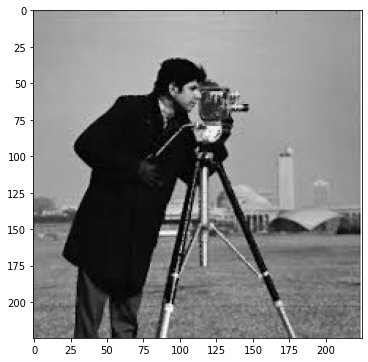

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
im_1=mpimg.imread('cameraman.jpg')
im_2=convert_rgb_to_gray_level(im_1)
#im_3=convert_rgb_to_gray_level_to_BW(im_2)
%matplotlib inline
plt.figure(figsize=(20,20))
plt.subplot(1,3,1),plt.imshow(im_1)
#plt.subplot(1,3,2),plt.imshow(im_2,cmap='gray')
#plt.subplot(1,3,3),plt.imshow(im_3,cmap='gray')

In [25]:
def get_default_mask_for_mean():
    return np.array([1,1,1,1,1,1,1,1,1]).reshape(3,3)/9
def apply_mask(part_of_image):
    mask=get_default_mask_for_mean()
    return sum(sum(part_of_image*mask))
def get_median_for_55(poi):
    s_1=poi.reshape(1,25)
    s_1.sort()
    return s_1[0,13]
def get_median(poi):
    s_1=poi.reshape(1,9)
    s_1.sort()
    return s_1[0,4]
def get_mean_filter_for_55(im_1):
    #im_1=plt.imread('')
    
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(3,m-3):
        for j in range(3,n-3):
            poi=im_1[i-2:i+3,j-2:j+3]
            # im_2[i,j]=apply_mask(poi)
            im_2[i,j]=get_median_for_55(poi)
            
    return im_2        
def get_mean_filter(im_1):
    #im_1=plt.imread('')
    
    m=im_1.shape[0]
    n=im_1.shape[1]
    im_2=np.zeros((m,n))
    for i in range(1,m-1):
        for j in range(1,n-1):
            poi = im_1[i-1:i+2,j-1:j+2]
            # im_2[i,j]=apply_mask(poi)
            im_2[i,j] =get_median(poi)
            
    return im_2  
     
 

In [26]:
apply_mask(im_2[1:4,1:4])

154.66666666666666

In [30]:
im_55=get_mean_filter_for_55(im_2)


(<matplotlib.axes._subplots.AxesSubplot at 0x2586a91eb70>,
 <matplotlib.image.AxesImage at 0x2586aaae7b8>)

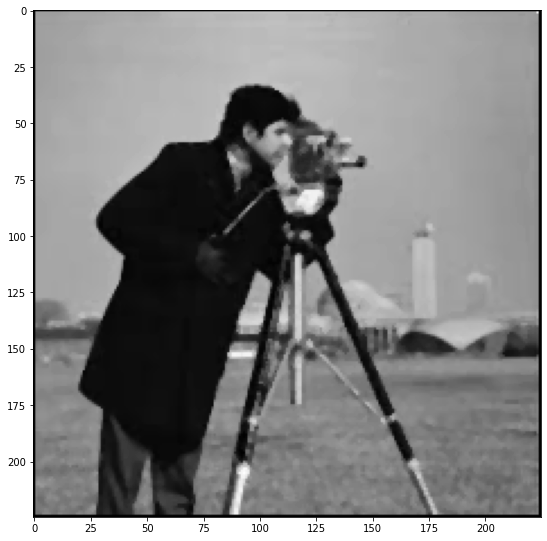

In [36]:
im_555=get_mean_filter(im_2)
plt.figure(figsize=(20,20))
plt.subplot(1,2,2),plt.imshow(im_555,cmap='gray')


(<matplotlib.axes._subplots.AxesSubplot at 0x2586aeb30f0>,
 <matplotlib.image.AxesImage at 0x2586ab2cd68>)

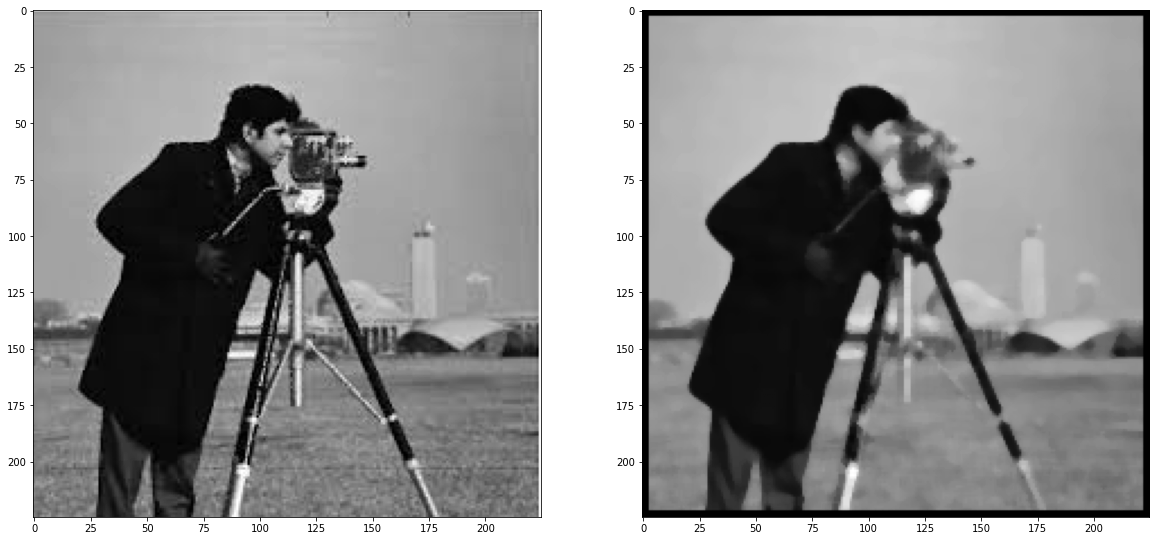

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1),plt.imshow(im_2,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im_55,cmap='gray')
